<a href="https://colab.research.google.com/github/asma-mo/Estate-Elite-Insights/blob/afnan_branch/data_cleaning/Python_code/Untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
import pandas as pd

In [48]:
from google.colab import auth
import pandas as pd
# importing numpy as np
import numpy as np

import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

Load the data +Clean Data

- Look at the proportion of missing data
- Check the data type of each column
- Dealing with Missing Values (NaN Values)
- Check the unique values of columns
- Dropping Columns


In [2]:
#Load the data

auth.authenticate_user()
project_id="data-analytics-bootcamp-363212"
data="prello"
table="POI_tourist_establishments"
query =  f"SELECT * FROM `{project_id}.{data}.{table}`"
POI_tourist_establishments=pd.read_gbq(query, project_id)
POI_tourist_establishments


,poi,name,latitude,longitude,municipality_code,importance,name_reprocessed
0,hotel,Club Med (Hôtel),45.678531,-1.163635,17225,0.078556,Club Med
1,hotel,Cabanes des Grands Cépages (Hôtel),44.026859,4.847491,84129,0.078419,Cabanes des Grands Cépages
2,hotel,Pierre et Vacances (Hôtel),50.331541,1.565677,80333,0.077999,Pierre et Vacances
3,hotel,Pierre & Vacances (Hôtel),43.285936,6.569696,83068,0.077702,Pierre & Vacances
4,hotel,Le Domaine du Golf (Hôtel),43.541050,3.752852,34095,0.077542,Le Domaine du Golf
...,...,...,...,...,...,...,...
26211,camp_site,Camping municipal,45.701000,2.041247,19164,0.040000,Camping municipal
26212,camp_site,Camping municipal,46.491559,3.020672,03238,0.040000,Camping municipal
26213,camp_site,Camping municipal,45.694389,2.120544,19241,0.040000,Camping municipal
26214,camp_site,Camping municipal,45.915488,2.487122,23131,0.040000,Camping municipal


In [3]:
#Check missing values
POI_tourist_establishments.isnull().any()

poi                  False
name                 False
latitude             False
longitude            False
municipality_code    False
importance           False
name_reprocessed     False
dtype: bool

In [4]:
#Check NaN values
POI_tourist_establishments.isna().any()

poi                  False
name                 False
latitude             False
longitude            False
municipality_code    False
importance           False
name_reprocessed     False
dtype: bool

In [5]:
#check duplicated values
POI_tourist_establishments.duplicated().any()

False

In [6]:
#check data type
POI_tourist_establishments.dtypes

poi                   object
name                  object
latitude             float64
longitude            float64
municipality_code     object
importance           float64
name_reprocessed      object
dtype: object

In [7]:
#rename column
POI_tourist_establishments.rename(columns = {'poi':'establishments_type'}, inplace = True)

<ipython-input-50-983074720d50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(POI_tourist_establishments.corr(), cmap="YlGnBu", annot=True)


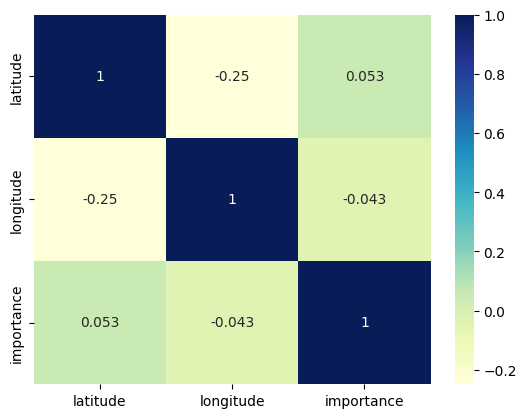

In [50]:
# plotting correlation heatmap
dataplot = sb.heatmap(POI_tourist_establishments.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [16]:
#Basic statistics
POI_tourist_establishments.describe()

,latitude,longitude,importance
count,26216.000000,26216.000000,26216.000000
mean,46.169628,2.724604,0.052033
std,2.260598,3.120466,0.012110
min,41.362968,-5.123231,0.030000
25%,44.173110,0.339955,0.043046
50%,45.924781,2.584392,0.050000
75%,48.301564,5.189572,0.063427
max,51.081814,9.555174,0.079078


<Axes: ylabel='Frequency'>

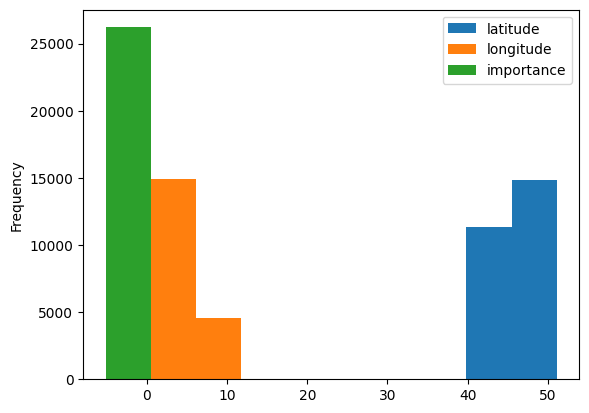

In [17]:
#data distributed
POI_tourist_establishments.plot(kind='hist')

<Axes: xlabel='latitude', ylabel='importance'>

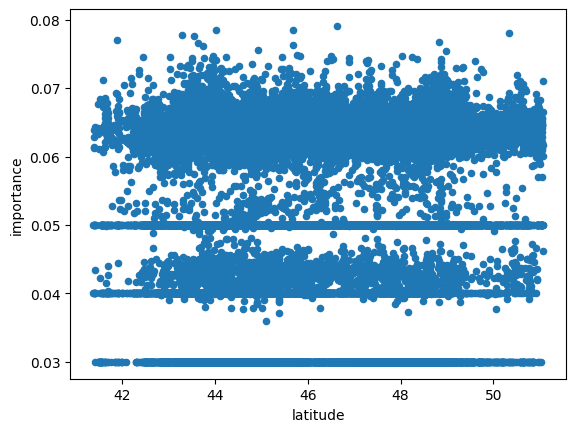

In [19]:
#data distributed
POI_tourist_establishments.plot.scatter('latitude', 'importance')

In [86]:
POI_tourist_establishments.to_csv("POI_tourist_establishments.csv")

In [21]:
#Load the data
auth.authenticate_user()
project_id="data-analytics-bootcamp-363212"
data="prello"
table="real_estate_info_by_municipality"
query =  f"SELECT * FROM `{project_id}.{data}.{table}`"
real_estate_info_by_municipality=pd.read_gbq(query, project_id)
real_estate_info_by_municipality

,municipality_code,intensite_tension_immo,rental_max_apartment,rental_min_apartment,rental_med_house,rental_max_house,rental_min_house,rental_med_all,rental_max_all,rental_min_all
0,57133,8,12.27,9.07,9.19,14.45,6.64,9.53,13.77,7.25
1,57446,8,18.22,7.69,10.92,14.16,7.77,11.09,15.97,7.73
2,77013,9,18.30,8.39,12.20,16.71,9.21,12.26,16.75,9.19
3,77026,9,15.76,6.28,9.51,13.20,7.04,9.53,13.23,7.03
4,77072,9,17.50,7.69,11.47,15.75,8.21,11.47,15.75,8.21
...,...,...,...,...,...,...,...,...,...,...
34436,81126,7,16.64,6.36,8.93,11.28,6.45,8.93,11.28,6.45
34437,33425,11,16.20,7.90,11.07,14.72,7.40,11.09,14.74,7.41
34438,85146,5,18.51,8.22,10.59,13.50,8.43,10.88,15.47,8.35
34439,53062,8,16.12,6.28,8.32,11.28,6.15,8.69,12.93,6.19


In [31]:
#Check missing values
real_estate_info_by_municipality.isnull().any()

municipality_code         False
intensite_tension_immo    False
rental_max_apartment      False
rental_min_apartment      False
rental_med_house           True
rental_max_house           True
rental_min_house           True
rental_med_all            False
rental_max_all            False
rental_min_all            False
dtype: bool

In [42]:
#number of missing values in each column
real_estate_info_by_municipality.isnull().sum()

municipality_code         0
intensite_tension_immo    0
rental_max_apartment      0
rental_min_apartment      0
rental_med_house          0
rental_max_house          0
rental_min_house          0
rental_med_all            0
rental_max_all            0
rental_min_all            0
dtype: int64

In [36]:
# filling  null value with mean of column
real_estate_info_by_municipality['rental_med_house']=real_estate_info_by_municipality['rental_med_house'].replace(to_replace = np.nan, value = real_estate_info_by_municipality['rental_med_house'].mean())

In [38]:
# filling  null value with mean of column
real_estate_info_by_municipality['rental_max_house']=real_estate_info_by_municipality['rental_max_house'].replace(to_replace = np.nan, value = real_estate_info_by_municipality['rental_max_house'].mean())

In [40]:
# filling  null value with mean of column
real_estate_info_by_municipality['rental_min_house']=real_estate_info_by_municipality['rental_min_house'].replace(to_replace = np.nan, value = real_estate_info_by_municipality['rental_min_house'].mean())

In [43]:
#Check NaN values
real_estate_info_by_municipality.isna().any()

municipality_code         False
intensite_tension_immo    False
rental_max_apartment      False
rental_min_apartment      False
rental_med_house          False
rental_max_house          False
rental_min_house          False
rental_med_all            False
rental_max_all            False
rental_min_all            False
dtype: bool

In [44]:
#check duplicated values
real_estate_info_by_municipality.duplicated().any()

False

In [45]:
#check data type
real_estate_info_by_municipality.dtypes

municipality_code          object
intensite_tension_immo      Int64
rental_max_apartment      float64
rental_min_apartment      float64
rental_med_house          float64
rental_max_house          float64
rental_min_house          float64
rental_med_all            float64
rental_max_all            float64
rental_min_all            float64
dtype: object

In [46]:
#rename column
real_estate_info_by_municipality.rename(columns = {'intensite_tension_immo':'demand_level'}, inplace = True)

<ipython-input-49-68d7a734eb0d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(real_estate_info_by_municipality.corr(), cmap="YlGnBu", annot=True)


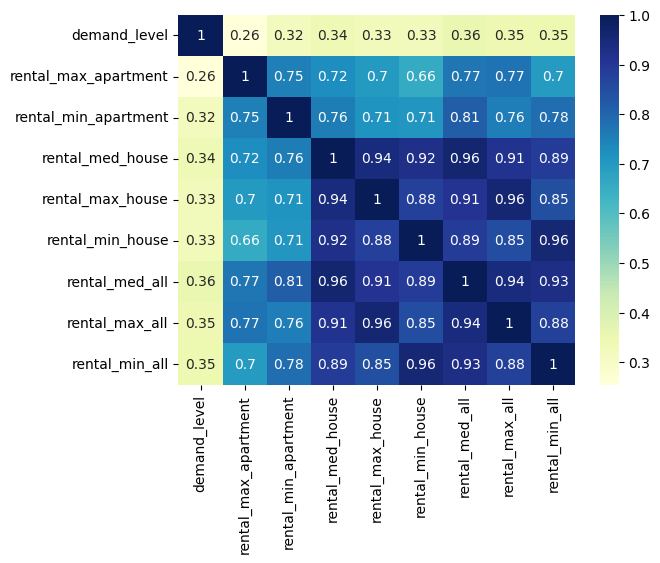

In [49]:
# plotting correlation heatmap
dataplot = sb.heatmap(real_estate_info_by_municipality.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [51]:
#Basic statistics
real_estate_info_by_municipality.describe()

,demand_level,rental_max_apartment,rental_min_apartment,rental_med_house,rental_max_house,rental_min_house,rental_med_all,rental_max_all,rental_min_all
count,34441.0,34441.000000,34441.000000,34441.000000,34441.000000,34441.000000,34441.000000,34441.000000,34441.000000
mean,9.21727,15.878574,7.462678,10.179351,13.424505,7.375303,10.190045,13.746826,7.355064
std,3.146829,3.555982,1.599958,2.280816,3.178016,1.715943,2.213078,3.348301,1.666057
min,4.0,7.550000,4.100000,6.040000,7.120000,3.820000,6.070000,7.300000,3.980000
25%,7.0,13.620000,6.400000,8.780000,11.420000,6.320000,8.790000,11.600000,6.330000
50%,9.0,15.420000,7.130000,9.660000,12.820000,7.010000,9.700000,13.080000,7.000000
75%,11.0,17.700000,8.230000,10.900000,14.490000,7.980000,10.980000,15.030000,7.950000
max,31.0,45.460000,27.810000,29.410000,41.630000,22.550000,34.810000,45.460000,27.810000


<Axes: ylabel='Frequency'>

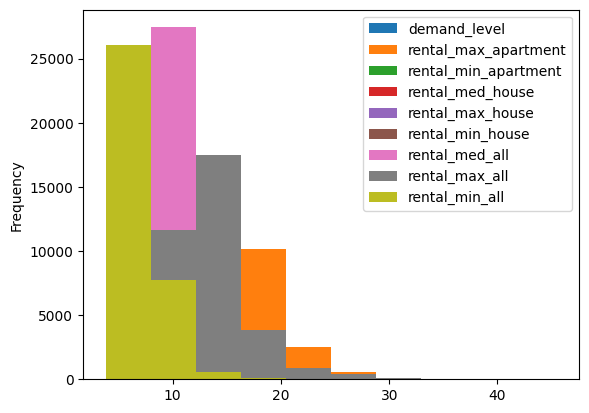

In [52]:
#data distributed
real_estate_info_by_municipality.plot(kind='hist')

In [87]:
real_estate_info_by_municipality.to_csv("real_estate_info_by_municipality.csv")

In [77]:
#Load the data

auth.authenticate_user()
project_id="data-analytics-bootcamp-363212"
data="prello"
table="average_salary_by_municipality"
query =  f"SELECT * FROM `{project_id}.{data}.{table}`"
average_salary_by_municipality=pd.read_gbq(query, project_id)
average_salary_by_municipality


,municipality_code,avg_net_salary,year,country_code
0,01004,26471.026727,2019,01
1,01007,26341.353419,2019,01
2,01014,25897.497842,2019,01
3,01024,25695.240341,2019,01
4,01025,26054.712323,2019,01
...,...,...,...,...
26670,97420,23364.247855,2015,01
26671,97421,19099.408481,2015,01
26672,97422,21854.551578,2015,01
26673,97423,20863.807536,2015,01


In [78]:
#Check missing values
average_salary_by_municipality.isnull().any()

municipality_code    False
avg_net_salary       False
year                 False
country_code         False
dtype: bool

In [79]:
#check duplicated values
average_salary_by_municipality.duplicated().any()

False

In [80]:
#check data type
average_salary_by_municipality.dtypes

municipality_code     object
avg_net_salary       float64
year                   Int64
country_code          object
dtype: object

In [81]:
#change data type
average_salary_by_municipality['year']= pd.to_datetime(average_salary_by_municipality['year'])
average_salary_by_municipality['year'] = average_salary_by_municipality['year'].dt.strftime('%Y') # extract the year
average_salary_by_municipality.dtypes

municipality_code     object
avg_net_salary       float64
year                  object
country_code          object
dtype: object

In [83]:
#drop column
average_salary_by_municipality.drop('country_code', axis=1, inplace=True)

In [88]:
#Basic statistics
average_salary_by_municipality.describe()

,avg_net_salary
count,26675.000000
mean,25845.419949
std,5052.783274
min,18305.605449
25%,22746.156889
50%,24554.543298
75%,27374.104178
max,85814.080997


<Axes: ylabel='Frequency'>

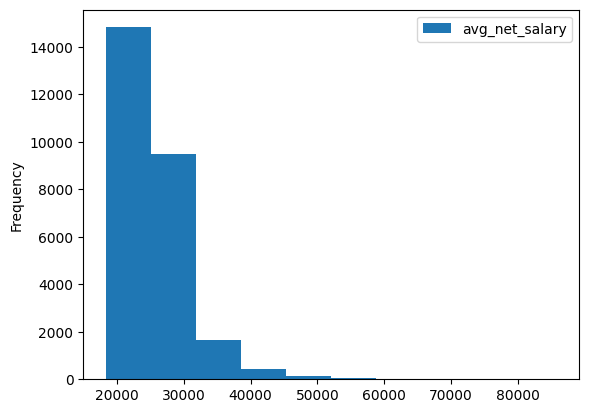

In [90]:
#data distributed
average_salary_by_municipality.plot(kind='hist')

In [ ]:
# plotting correlation heatmap
dataplot = sb.heatmap(average_salary_by_municipality.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [89]:
average_salary_by_municipality.to_csv("average_salary_by_municipality.csv")